<a href="https://colab.research.google.com/github/eliaahadi/notebooks/blob/main/AI_Job_Market_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
abhishekjaiswal4896_ai_job_market_trends_path = kagglehub.dataset_download('abhishekjaiswal4896/ai-job-market-trends')

print('Data source import complete.')


Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

# display settings
sns.set(style='whitegrid', palette='muted', color_codes=True)

# predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# set random seed
import random
random.seed(42)
np.random.seed(42)

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/kaggle/input/ai-job-market-trends/ai_job_market.csv")
df.head()

,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [4]:
df.tail()


,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
1995,1996,"Mueller, Ellis and Clark",Finance,NLP Engineer,"Flask, FastAPI, Power BI",Senior,Internship,"Washingtonmouth, SD",90382-110126,2024-04-22,Large,MLflow
1996,1997,Roberts-Yu,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",Mid,Remote,"Joshuafort, ZA",47848-137195,2023-12-02,Large,"KDB+, LangChain, MLflow"
1997,1998,"Brooks, Williams and Randolph",Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",Entry,Contract,"West Brittanyburgh, CG",134994-180108,2023-10-29,Large,PyTorch
1998,1999,Castaneda-Smith,Education,Quant Researcher,"AWS, Python, Scikit-learn",Senior,Contract,"Anthonyshire, OM",62388-82539,2024-08-10,Large,"MLflow, TensorFlow, FastAPI"
1999,2000,Estes Group,Finance,Quant Researcher,"Flask, TensorFlow, Power BI",Senior,Full-time,"Benjaminview, NE",55835-97374,2025-02-20,Startup,MLflow


In [5]:
df.dtypes


job_id               int64
company_name        object
industry            object
job_title           object
skills_required     object
experience_level    object
employment_type     object
location            object
salary_range_usd    object
posted_date         object
company_size        object
tools_preferred     object
dtype: object

In [6]:
df.describe()


,job_id
count,2000.000000
mean,1000.500000
std,577.494589
min,1.000000
25%,500.750000
50%,1000.500000
75%,1500.250000
max,2000.000000


In [7]:
df.isnull().sum()


job_id              0
company_name        0
industry            0
job_title           0
skills_required     0
experience_level    0
employment_type     0
location            0
salary_range_usd    0
posted_date         0
company_size        0
tools_preferred     0
dtype: int64

<Axes: >

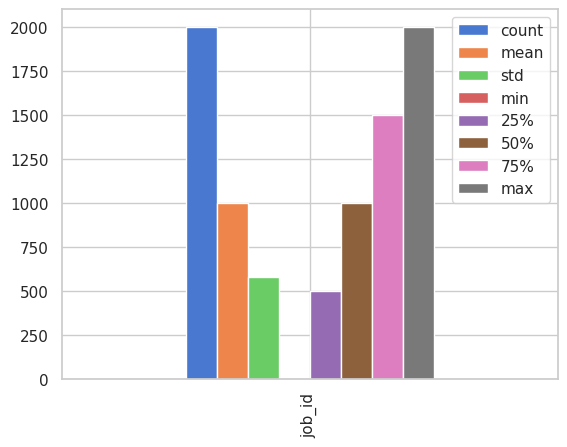

In [8]:
df.describe().T.plot(kind='bar')


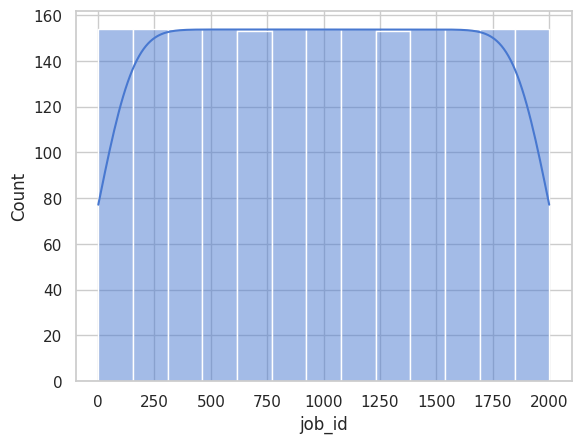

In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Distribution plot for each numerical column
for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

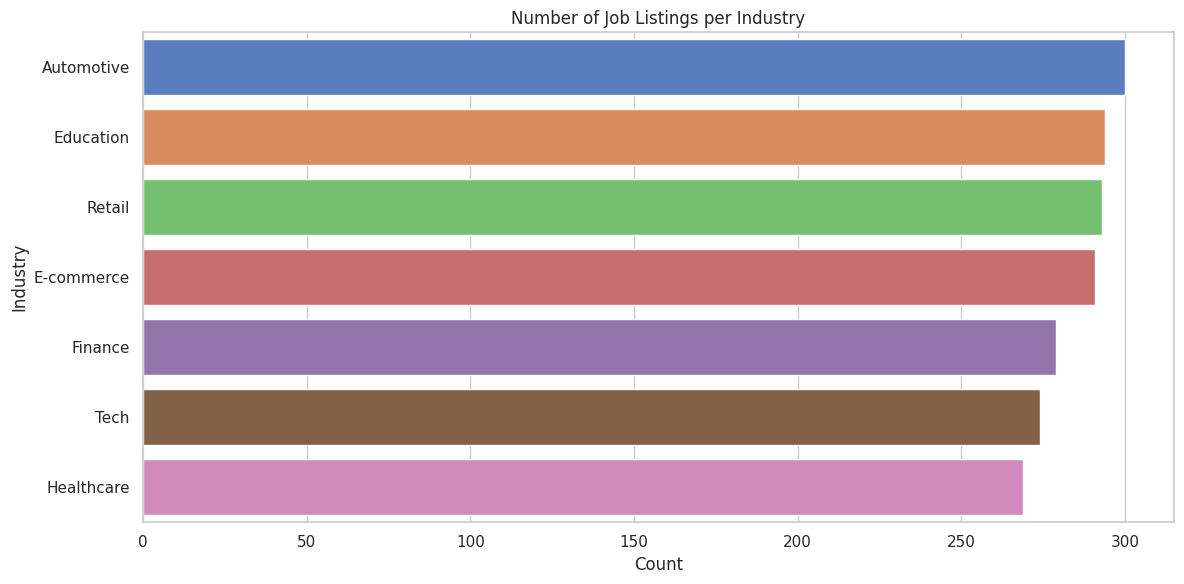

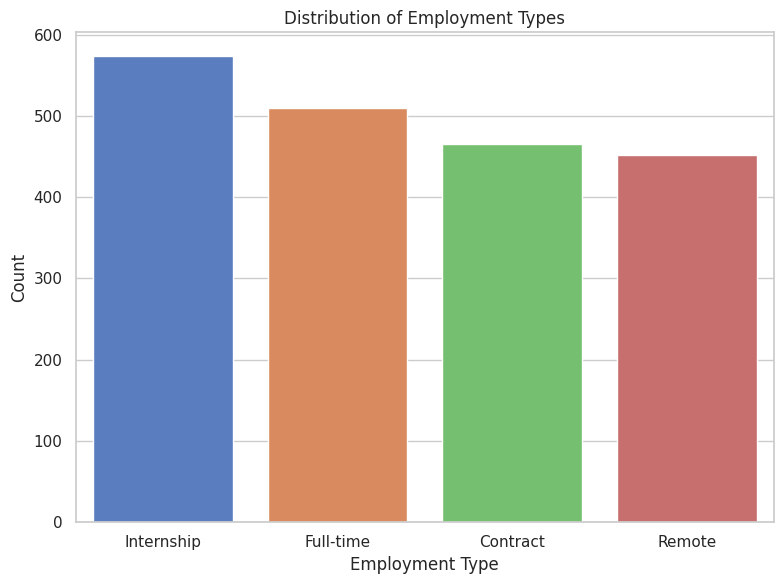

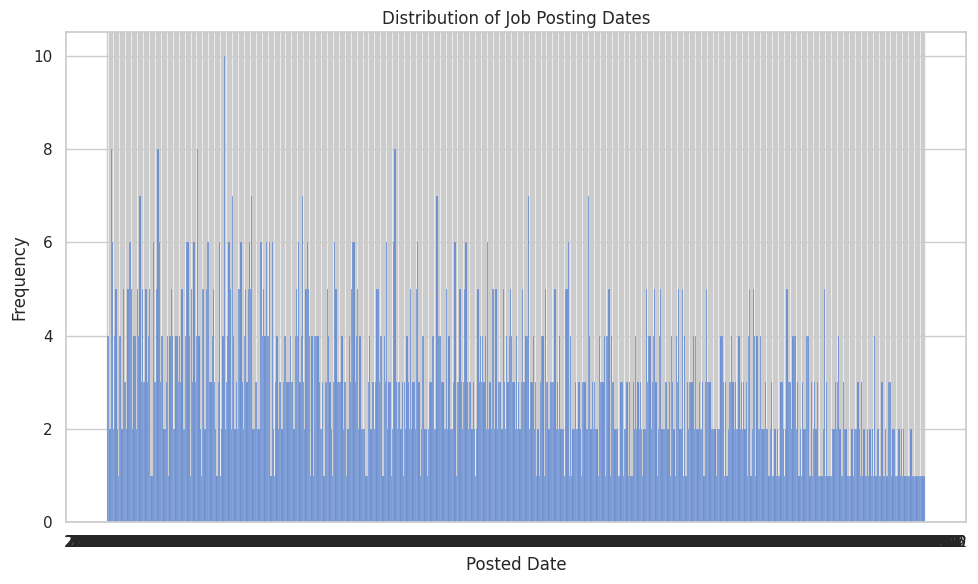

Not enough numeric features for a correlation heatmap.


In [10]:
# Plot 1: Countplot of Industry Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='industry', order=df['industry'].value_counts().index)
plt.title('Number of Job Listings per Industry')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

# Plot 2: Countplot of Employment Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='employment_type', order=df['employment_type'].value_counts().index)
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot 3: Histogram of Posted Dates
plt.figure(figsize=(10, 6))
sns.histplot(df['posted_date'].dropna(), bins=30, kde=False)
plt.title('Distribution of Job Posting Dates')
plt.xlabel('Posted Date')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# If the dataset had more numeric columns, we could create a correlation heatmap.
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric features for a correlation heatmap.')

Prediction Accuracy: 0.3575

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.35      0.35       136
           1       0.31      0.33      0.32       118
           2       0.39      0.39      0.39       146

    accuracy                           0.36       400
   macro avg       0.36      0.36      0.36       400
weighted avg       0.36      0.36      0.36       400



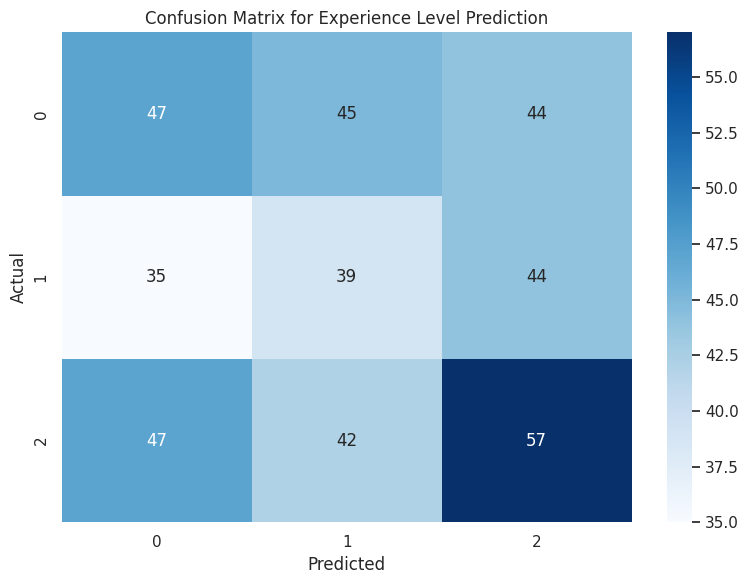

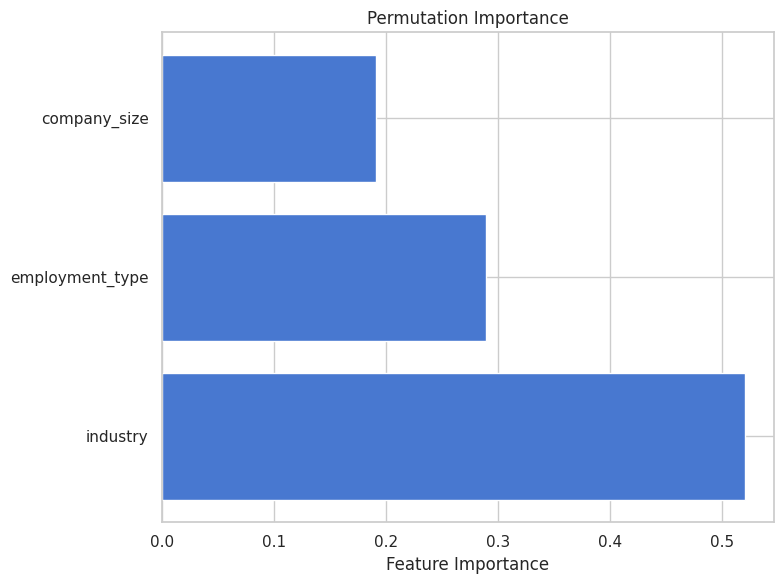

In [11]:
# For the predictive model, we will use a subset of features that we suspect have predictive power for 'experience_level'.
# Selected features: 'industry', 'employment_type', 'company_size'

# Check that the target and the features exist in the dataset
selected_features = ['industry', 'employment_type', 'company_size']

if all([col in df.columns for col in selected_features + ['experience_level']]):
    model_df = df[selected_features + ['experience_level']].copy()

    # Drop rows with missing values in these columns
    model_df.dropna(inplace=True)

    # Encoding categorical features using pandas' factorize method
    for col in selected_features + ['experience_level']:
        model_df[col] = pd.factorize(model_df[col])[0]

    # Split data into training and testing sets (80/20 split)
    X = model_df[selected_features]
    y = model_df['experience_level']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Instantiate and train a RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Prediction Accuracy:', accuracy)
    print('\nClassification Report:\n', classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Experience Level Prediction')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Permutation Importance Plot (simple bar plot for feature importances)
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [selected_features[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title('Permutation Importance')
    plt.tight_layout()
    plt.show()
else:
    print('Required columns for predictive modeling are missing from the dataset.')

In [12]:
import pandas as pd

# 1. Create Sample Job Market Data
data = {
    'JobTitle': ['Data Scientist', 'ML Engineer', 'Data Analyst', 'AI Researcher'],
    'Salary_USD': [130000, 155000, 95000, 180000],
    'Required_Skill': ['Python, SQL, R', 'PyTorch, TensorFlow', 'SQL, Tableau', 'Deep Learning, NLP'],
    'Location': ['San Francisco', 'New York', 'Austin', 'Remote'],
    'DatePosted': ['2025-10-01', '2025-10-05', '2025-10-10', '2025-10-12']
}

# Create a DataFrame
df_job_market = pd.DataFrame(data)

# 2. Save the DataFrame to a CSV file
# index=False prevents pandas from adding an unwanted index column to the CSV.
filename = 'ai_job_market_data2.csv'
df_job_market.to_csv(filename, index=False)

print(f"✅ CSV file '{filename}' successfully created in the output directory.")
print("\n--- First 3 rows of the CSV Data ---")
print(df_job_market.head(3).to_markdown(index=False))

✅ CSV file 'ai_job_market_data2.csv' successfully created in the output directory.

--- First 3 rows of the CSV Data ---
| JobTitle       |   Salary_USD | Required_Skill      | Location      | DatePosted   |
|:---------------|-------------:|:--------------------|:--------------|:-------------|
| Data Scientist |       130000 | Python, SQL, R      | San Francisco | 2025-10-01   |
| ML Engineer    |       155000 | PyTorch, TensorFlow | New York      | 2025-10-05   |
| Data Analyst   |        95000 | SQL, Tableau        | Austin        | 2025-10-10   |
